# libraries and data imports

In [3]:
import csv
import datetime as dt
import json
import os
import statistics
import time
from ast import literal_eval
import itertools
import re

# third-party imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# increase default row display
pd.set_option('display.max_rows', 1000)

In [178]:
df_streaming_data = pd.read_csv('datasets/streaming_data.csv')

In [179]:
df_track_data = pd.read_csv('datasets/track_data.csv')

In [93]:
df_streaming_data = pd.read_csv('datasets/streaming_data_ready.csv')
df_track_data = pd.read_csv('datasets/track_data_ready.csv')

# preparing the data

In [180]:
display(df_streaming_data.describe().round(2))
display(df_track_data.describe().round(2))

,index,msPlayed,track_popularity,track_duration,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,track_time_signature,sPlayed
count,22069.00,22069.00,22069.00,22069.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,22069.00
mean,11049.70,166688.01,41.05,194260.19,0.61,0.38,5.66,-11.96,0.82,0.08,0.59,0.04,0.17,0.41,121.40,3.92,166.69
std,6382.06,79430.85,11.91,48062.63,0.16,0.25,2.94,5.47,0.39,0.06,0.36,0.12,0.11,0.22,29.49,0.31,79.43
min,0.00,0.00,0.00,22000.00,0.21,0.01,0.00,-42.72,0.00,0.02,0.00,0.00,0.03,0.04,63.97,1.00,0.00
25%,5523.00,150937.00,34.00,174000.00,0.50,0.16,4.00,-15.93,1.00,0.04,0.19,0.00,0.10,0.25,98.00,4.00,150.94
50%,11044.00,183823.00,41.00,189693.00,0.63,0.30,6.00,-11.12,1.00,0.05,0.73,0.00,0.12,0.35,115.97,4.00,183.82
75%,16575.00,203553.00,47.00,213611.00,0.75,0.59,8.00,-7.63,1.00,0.09,0.92,0.01,0.25,0.57,137.92,4.00,203.55
max,22111.00,1082813.00,88.00,619066.00,0.88,0.96,11.00,-1.73,1.00,0.41,0.99,0.93,0.84,0.98,207.91,5.00,1082.81


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00
mean,0.59,0.52,5.13,-8.89,0.76,0.07,0.42,0.07,0.17,0.47,120.47,208110.96,3.90
std,0.15,0.25,3.61,4.54,0.43,0.07,0.35,0.21,0.13,0.24,30.62,59899.67,0.41
min,0.16,0.01,0.00,-42.72,0.00,0.02,0.00,0.00,0.02,0.04,36.02,22000.00,1.00
25%,0.49,0.32,2.00,-11.07,1.00,0.03,0.08,0.00,0.10,0.27,96.28,177603.00,4.00
50%,0.60,0.52,5.00,-7.93,1.00,0.04,0.34,0.00,0.12,0.46,118.11,205245.50,4.00
75%,0.70,0.73,8.00,-5.51,1.00,0.07,0.77,0.00,0.20,0.66,138.75,237404.75,4.00
max,0.96,0.99,11.00,-0.59,1.00,0.93,0.99,0.96,0.92,0.98,207.93,619067.00,5.00


In [181]:
display(df_streaming_data.isnull().sum())
display(df_track_data.isnull().sum())

index                         0
endTime                       0
artistName                    0
trackName                     0
msPlayed                      0
track_id                      0
track_popularity              0
track_duration                0
track_explicit                0
track_danceability        12045
track_energy              12045
track_key                 12045
track_loudness            12045
track_mode                12045
track_speechiness         12045
track_acousticness        12045
track_instrumentalness    12045
track_liveness            12045
track_valence             12045
track_tempo               12045
track_time_signature      12045
sPlayed                       0
dtype: int64

track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [182]:
# drop track_danceability, track_energy, track_key, track_loudness, track_mode, track_speechiness , track_acousticness, track_instrumentalness, track_liveness , track_valence, track_tempo, track_time_signature
df_streaming_data.drop(columns=['track_danceability', 'track_energy', 'track_key', 'track_loudness', 'track_mode', 'track_speechiness' , 'track_acousticness', 'track_instrumentalness', 'track_liveness' , 'track_valence', 'track_tempo', 'track_time_signature'], inplace=True)

In [183]:
# columns data type
display(df_streaming_data.dtypes)
display(df_track_data.dtypes)


index                 int64
endTime              object
artistName           object
trackName            object
msPlayed              int64
track_id             object
track_popularity    float64
track_duration      float64
track_explicit         bool
sPlayed             float64
dtype: object

track_id             object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [184]:
# convert cols to datetime
df_streaming_data['endTime'] = pd.to_datetime(df_streaming_data['endTime'])
df_streaming_data['msPlayed_dt'] = pd.to_timedelta(df_streaming_data['msPlayed'], unit='ms')
df_track_data['duration_ms_dt'] = pd.to_timedelta(df_track_data['duration_ms'], unit='ms')

In [185]:
# filter data to only 2023
df_streaming_data = df_streaming_data[df_streaming_data['endTime'].dt.year == 2023]

In [186]:
# print msPlayed_dt total minutes
print(df_streaming_data['msPlayed_dt'].sum() / pd.Timedelta(minutes=1))

48315.90198333334


In [187]:
compactViewCols = ['endTime', 'artistName', 'trackName', 'msPlayed_dt', 'track_id']

In [188]:
# remove all Unknown Artist rows
df_streaming_data = df_streaming_data[df_streaming_data['artistName'] != 'Unknown Artist']

In [189]:
#get only unique trackName and artistName in df_streaming_data
df_streaming_data_unique = df_streaming_data.drop_duplicates(subset=['track_id', 'trackName', 'artistName'])

In [190]:
print(df_streaming_data_unique.shape)
print(df_streaming_data_unique['track_id'].nunique())

(818, 11)
814


In [191]:
# show duplicate rows from df_streaming_data_unique
df_streaming_data_unique[df_streaming_data_unique.duplicated(subset=['track_id'], keep=False)].sort_values(by=['trackName', 'artistName'])

,index,endTime,artistName,trackName,msPlayed,track_id,track_popularity,track_duration,track_explicit,sPlayed,msPlayed_dt
5032,5038,2023-01-02 05:29:00,dodie,.,83264,3bq7dXN7arTdaq8mmKXxob,64.0,158133.0,False,83.264,0 days 00:01:23.264000
5024,5030,2023-01-02 05:08:00,dodie,?,72035,3bq7dXN7arTdaq8mmKXxob,64.0,158133.0,False,72.035,0 days 00:01:12.035000
5856,5862,2023-01-19 15:34:00,Laufey,Love to Keep Me Warm,211989,3bq7dXN7arTdaq8mmKXxob,64.0,158133.0,False,211.989,0 days 00:03:31.989000
6332,6338,2023-01-23 10:59:00,Wasia Project,Why Don't U Love Me,158962,4E7gBwAIuKqyd16eHwY1gF,49.0,216612.0,False,158.962,0 days 00:02:38.962000
7378,7384,2023-02-08 06:05:00,Wasia Project,why don't u love me? - re-recorded,216612,4E7gBwAIuKqyd16eHwY1gF,49.0,216612.0,False,216.612,0 days 00:03:36.612000
6367,6373,2023-01-27 02:54:00,Wasia Project,why dont u love me? - re-recorded,20239,4E7gBwAIuKqyd16eHwY1gF,49.0,216612.0,False,20.239,0 days 00:00:20.239000


In [192]:
# update trackName for track_id "4E7gBwAIuKqyd16eHwY1gF" to "why don't u love me? - re-recorded"
df_streaming_data.loc[df_streaming_data['track_id'] == '4E7gBwAIuKqyd16eHwY1gF', 'trackName'] = "why don't u love me? - re-recorded"

In [193]:
# drop rows with track_name '.' and '?' from df_streaming_data since their track_id is wrong
df_streaming_data = df_streaming_data[df_streaming_data['trackName'] != '.']
df_streaming_data = df_streaming_data[df_streaming_data['trackName'] != '?']

In [195]:
#get only unique trackName and artistName in df_streaming_data
df_streaming_data_unique = df_streaming_data.drop_duplicates(subset=['track_id', 'trackName', 'artistName'])

In [196]:
print(df_streaming_data_unique.shape)
print(df_streaming_data_unique['track_id'].nunique())

(814, 11)
814


In [198]:
df_streaming_data_unique.reset_index(drop=True, inplace=True)

In [201]:
# get trackName and artistName from streaming_data_unique
df_track_data['trackName'] = df_track_data['track_id'].map(df_streaming_data_unique.set_index('track_id')['trackName'])
df_track_data['artistName'] = df_track_data['track_id'].map(df_streaming_data_unique.set_index('track_id')['artistName'])

In [207]:
# remove all rows with NaN trackName and artistName
df_track_data = df_track_data[df_track_data['trackName'].notna()]

In [215]:
# show number of unique values in each column
display(df_track_data.nunique())

track_id            814
danceability        422
energy              537
key                  12
loudness            792
mode                  2
speechiness         467
acousticness        620
instrumentalness    504
liveness            427
valence             537
tempo               804
type                  1
id                  814
uri                 814
track_href          814
analysis_url        814
duration_ms         802
time_signature        4
duration_ms_dt      802
trackName           800
artistName          348
dtype: int64

In [216]:
# drop id and type columns because they are redundant and not useful
df_track_data.drop(columns=['id', 'type'], inplace=True)

In [98]:
# group by track_id and get the number of appearances of each track_id and sum the duration_ms from streaming_data
df_track_data_grouped = df_streaming_data.groupby('track_id').agg({'msPlayed_dt': 'sum', 'endTime': 'count'}).reset_index()

In [99]:
df_track_data_grouped.columns = ['track_id', 'msPlayed_total', 'num_played']

In [100]:
df_track_data_grouped.sort_values(by=['num_played'], ascending=False).head(5)

,track_id,msPlayed_total,num_played
62,0c0vb1jBQTxvtGRt9RKZnE,0 days 17:22:09.519000,328
633,6BSDpXlm2gtorEzoH4RNHw,0 days 09:32:59.714000,292
43,0RyQTFH6hABT79RpSsVJU4,0 days 13:14:52.165000,279
797,7oIGWbgAbukbtTIdxnlIwd,0 days 10:53:23.582000,260
332,3AlbodF0tKd4Pzhm2wbZdU,0 days 10:47:35.969000,259


In [237]:
df_track_data_grouped.sort_values(by=['num_played'], ascending=False).head(5)

,track_id,msPlayed_total,num_played
62,0c0vb1jBQTxvtGRt9RKZnE,0 days 17:22:09.519000,328
633,6BSDpXlm2gtorEzoH4RNHw,0 days 09:32:59.714000,292
43,0RyQTFH6hABT79RpSsVJU4,0 days 13:14:52.165000,279
797,7oIGWbgAbukbtTIdxnlIwd,0 days 10:53:23.582000,260
332,3AlbodF0tKd4Pzhm2wbZdU,0 days 10:47:35.969000,259


In [104]:
# get trackName and artistName from streaming_data_unique
df_track_data['total_played_duration'] = df_track_data['track_id'].map(df_track_data_grouped.set_index('track_id')['msPlayed_total'])
df_track_data['total_played_count'] = df_track_data['track_id'].map(df_track_data_grouped.set_index('track_id')['num_played'])

In [105]:
df_track_data[df_track_data['track_id'] == '6BSDpXlm2gtorEzoH4RNHw']

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,duration_ms_dt,trackName,artistName,total_played_duration,total_played_count
214,6BSDpXlm2gtorEzoH4RNHw,0.789,0.212,3,-11.85,1,0.0493,0.85,0.000031,0.107,...,spotify:track:6BSDpXlm2gtorEzoH4RNHw,https://api.spotify.com/v1/tracks/6BSDpXlm2gto...,https://api.spotify.com/v1/audio-analysis/6BSD...,124365,3,0 days 00:02:04.365000,Words Ain't Enough,Tessa Violet,0 days 09:32:59.714000,292


In [107]:
# save the new data to csv
df_track_data.to_csv('datasets/track_data_ready.csv', index=False)
df_streaming_data.to_csv('datasets/streaming_data_ready.csv', index=False)

# similarity between tracks

In [109]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

In [110]:
df_track_data['track'] = df_track_data['artistName'] + ' - ' + df_track_data['trackName']

In [111]:
df_track_data.columns

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'duration_ms_dt', 'trackName', 'artistName',
       'total_played_duration', 'total_played_count', 'track'],
      dtype='object')

In [112]:
cols = ['track', 'total_played_duration', 'total_played_count', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [113]:
df_tracks = df_track_data[cols]

In [114]:
df_tracks.columns

Index(['track', 'total_played_duration', 'total_played_count', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [82]:
df_tracks.describe()

,total_played_count,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,20.886978,0.590898,0.518777,5.154791,-8.915489,0.764128,0.069221,0.421912,0.065983,0.170824,0.479267,120.006069,209782.880835,3.904177
std,45.294684,0.145071,0.249440,3.595558,4.538861,0.424804,0.069424,0.346678,0.204878,0.130153,0.245178,30.513064,57996.363026,0.372032
min,1.000000,0.198000,0.008350,0.000000,-25.277000,0.000000,0.022900,0.000003,0.000000,0.021200,0.039100,36.019000,22000.000000,1.000000
25%,2.000000,0.493250,0.319250,2.000000,-11.238250,1.000000,0.034800,0.085600,0.000000,0.096425,0.274000,96.001250,178851.250000,4.000000
50%,4.000000,0.599000,0.514000,5.000000,-7.942500,1.000000,0.045100,0.341500,0.000022,0.118000,0.460000,118.062000,207277.000000,4.000000
75%,8.000000,0.704000,0.734750,8.000000,-5.458500,1.000000,0.070775,0.783750,0.002538,0.200250,0.677750,137.986250,240500.500000,4.000000
max,328.000000,0.962000,0.990000,11.000000,-0.589000,1.000000,0.776000,0.993000,0.962000,0.922000,0.981000,207.927000,537653.000000,5.000000


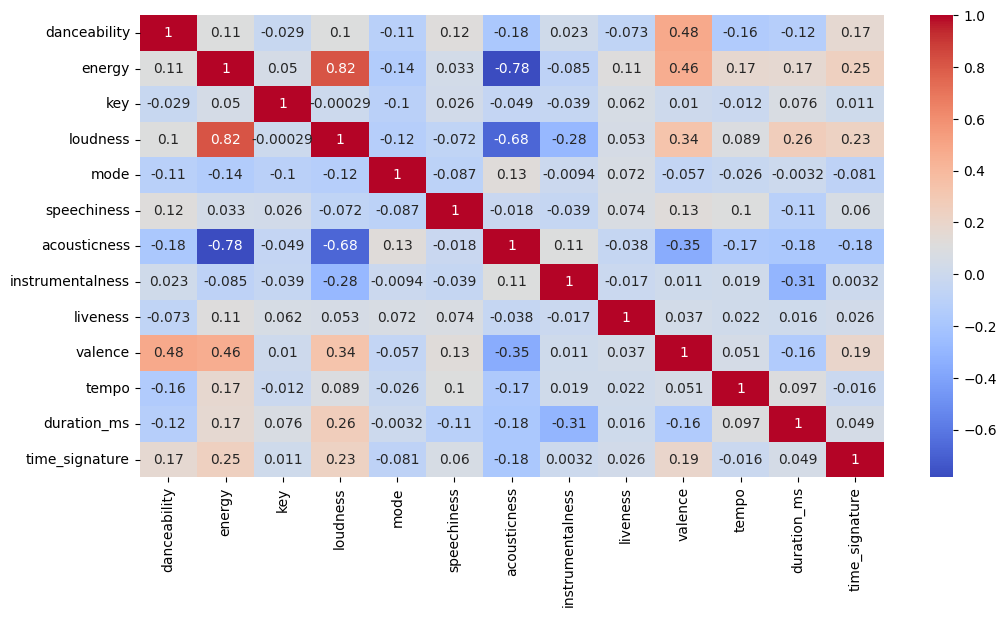

In [118]:
# visualize correlation between features in df_tracks
plt.figure(figsize=(12,6))
sns.heatmap(df_tracks.iloc[:,3:].corr(), annot=True, cmap='coolwarm')
plt.show()

In [120]:
# normalize df_tracks features (except track)
df_tracks_norm = df_tracks.copy()
df_tracks_norm.iloc[:, 3:] = normalize(df_tracks_norm.iloc[:, 3:], axis=0)


In [149]:
df_tracks_norm.describe()

,total_played_duration,total_played_count,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,814,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,8.140000e+02,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,0 days 00:59:13.181476658,20.886978,0.034040,0.031592,0.028753,-0.031239,0.030639,0.024755,2.708736e-02,0.010751,0.027886,0.031208,0.033970,0.033784,0.034892
std,0 days 02:11:09.952618855,45.294684,0.008357,0.015190,0.020056,0.015904,0.017033,0.024828,2.225724e-02,0.033381,0.021247,0.015965,0.008637,0.009340,0.003325
min,0 days 00:00:00,1.000000,0.011406,0.000508,0.000000,-0.088568,0.000000,0.008190,1.746278e-07,0.000000,0.003461,0.002546,0.010196,0.003543,0.008937
25%,0 days 00:04:40.583000,2.000000,0.028415,0.019441,0.011156,-0.039378,0.040096,0.012446,5.495641e-03,0.000000,0.015741,0.017842,0.027175,0.028803,0.035749
50%,0 days 00:10:34.030500,4.000000,0.034507,0.031301,0.027890,-0.027830,0.040096,0.016129,2.192478e-02,0.000004,0.019263,0.029953,0.033420,0.033381,0.035749
75%,0 days 00:25:03.745750,8.000000,0.040556,0.044744,0.044624,-0.019126,0.040096,0.025311,5.031786e-02,0.000413,0.032690,0.044132,0.039060,0.038731,0.035749
max,0 days 17:22:09.519000,328.000000,0.055419,0.060288,0.061358,-0.002064,0.040096,0.277521,6.375200e-02,0.156740,0.150511,0.063879,0.058858,0.086586,0.044686


In [148]:
# show variance, mean, and std of each column
display(df_tracks_norm.iloc[:,3:].var())
display(df_tracks_norm.iloc[:,3:].mean())
display(df_tracks_norm.iloc[:,3:].std())

danceability        0.000070
energy              0.000231
key                 0.000402
loudness            0.000253
mode                0.000290
speechiness         0.000616
acousticness        0.000495
instrumentalness    0.001114
liveness            0.000451
valence             0.000255
tempo               0.000075
duration_ms         0.000087
time_signature      0.000011
dtype: float64

danceability        0.034040
energy              0.031592
key                 0.028753
loudness           -0.031239
mode                0.030639
speechiness         0.024755
acousticness        0.027087
instrumentalness    0.010751
liveness            0.027886
valence             0.031208
tempo               0.033970
duration_ms         0.033784
time_signature      0.034892
dtype: float64

danceability        0.008357
energy              0.015190
key                 0.020056
loudness            0.015904
mode                0.017033
speechiness         0.024828
acousticness        0.022257
instrumentalness    0.033381
liveness            0.021247
valence             0.015965
tempo               0.008637
duration_ms         0.009340
time_signature      0.003325
dtype: float64

In [122]:
cosine_similarity_array = cosine_similarity(df_tracks_norm.iloc[:, 3:])

In [123]:
similarity_df = pd.DataFrame(cosine_similarity_array, index=df_tracks['track'], columns=df_tracks['track'])

In [128]:
df_track_data[['track', 'total_played_duration', 'total_played_count']].sort_values(by=['total_played_duration'], ascending=False).head(10)

,track,total_played_duration,total_played_count
220,Pomplamoose - Rainbow Connection,0 days 17:22:09.519000,328
382,"Pomplamoose - Harder, Better, Faster, Stronger",0 days 14:38:10.517000,246
380,Pomplamoose - Mr. Blue Sky,0 days 14:15:14.351000,227
299,Lawrence - Don't Lose Sight (Acoustic),0 days 13:38:30.397000,142
408,Pomplamoose - Say So,0 days 13:14:52.165000,279
733,Lake Street Dive - Hypotheticals - Edit,0 days 11:57:59.716000,244
377,Pomplamoose - Bulletproof,0 days 11:22:51.301000,237
771,Scary Pockets - I Need You,0 days 11:20:25.410000,225
168,Pomplamoose - Breakup Mashup,0 days 10:53:23.582000,260
167,Pomplamoose - Shotgun,0 days 10:47:35.969000,259


In [133]:
similarity_df["Lawrence - Don't Lose Sight (Acoustic)"].sort_values(ascending=False).head(10)

track
Lawrence - Don't Lose Sight (Acoustic)           1.000000
Wasia Project - impossible                       0.973535
The Arcadian Wild - Wander. Wonder.              0.951650
Lawrence - And Many More / More (Live in NYC)    0.950744
mxmtoon - almost home                            0.947672
Orla Gartland - Bloodline / Difficult Things     0.944343
RADWIMPS - Nandemonaiya - movie ver.             0.944330
Aimer - RE:I AM                                  0.942264
Daniela Andrade - Thinkin Bout You               0.939206
kobasolo - 君に届け feat.竹内美宥(AKB48)                 0.938079
Name: Lawrence - Don't Lose Sight (Acoustic), dtype: float64

In [150]:
similarity_df.head(5)

track,Orla Gartland - Codependency,The 1975 - Be My Mistake,Daisy the Great - IDKW,Alvvays - Dreams Tonite,Wasia Project - ur so pretty,girli - More Than a Friend,Baby Queen - Colours Of You,Tessa Violet - Bad Ideas,beabadoobee - Dance with Me,Orla Gartland - Why Am I Like This?,...,stories - That Thing You Do,Lawrence - Quarantined With You,Lawrence - Misty Morning,Lawrence - False Alarms (with Jon Bellion),Lawrence - Me & You,Lawrence - More,Scary Pockets - deja vu,Lawrence - i'm confident that i'm insecure (acoustic-ish),Couch - Fall Into Place,Victor Franco - Glad I'm Not Alone
track,,,,,,,,,,,,,,,,,,,,,
Orla Gartland - Codependency,1.000000,0.745054,0.811406,0.933097,0.747916,0.896815,0.791140,0.697770,0.774096,0.935599,...,0.735679,0.760178,0.855165,0.898778,0.889050,0.944782,0.844964,0.964810,0.883468,0.748295
The 1975 - Be My Mistake,0.745054,1.000000,0.592354,0.753192,0.961456,0.723072,0.866368,0.684598,0.948406,0.896175,...,0.951689,0.948715,0.854890,0.718597,0.722704,0.821350,0.725905,0.661929,0.838809,0.720168
Daisy the Great - IDKW,0.811406,0.592354,1.000000,0.635013,0.682834,0.652650,0.610729,0.776529,0.663211,0.760233,...,0.652858,0.677310,0.741513,0.677057,0.887358,0.852308,0.769471,0.856143,0.605521,0.591513
Alvvays - Dreams Tonite,0.933097,0.753192,0.635013,1.000000,0.736849,0.968456,0.801105,0.673000,0.775028,0.922691,...,0.752919,0.752618,0.892416,0.960971,0.829847,0.872453,0.852516,0.909488,0.921907,0.766728
Wasia Project - ur so pretty,0.747916,0.961456,0.682834,0.736849,1.000000,0.717768,0.828978,0.688396,0.955724,0.904214,...,0.970808,0.958462,0.841779,0.698570,0.773697,0.833184,0.720048,0.717971,0.792807,0.675743
